In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, r2_score


In [ ]:


#cargue de archivos

data = pd.read_excel('/content/data_proyecto_solo_mes.xlsx')
# los datos reales de prediccion
#data_valores = pd.read_excel('/content/valoresmes6.xlsx')
# Leer los datos que se quieren predecir
#data_prediccion = pd.read_excel('prediccion6.xlsx')
#path = 'C:/Users/William Wallace/Desktop/data_proyecto_inteleigencia_modificado.xlsx'
#data = pd.read_excel(path)


#dataframe reporte PQRSD_Formato_Servicios
dataframe = pd.DataFrame(data,columns=data.columns)
#dataframe = dataframe.groupby(['Id_Beneficiario','mes_creacion','valor_numerico_categoria']).size().reset_index(name='Count')

#dataframe_valores = pd.DataFrame(data_valores,columns=data_valores.columns)
#dataframe_valores = dataframe_valores.groupby(['ID_Beneficiario']).size().reset_index(name='Count')
#dataframe_valores = dataframe_valores.sort_values(by='ID_Beneficiario', ascending=False)

#dataframe_prediccion = pd.DataFrame(data_prediccion,columns=data_prediccion.columns)
#dataframe_prediccion = dataframe_prediccion.sort_values(by='ID_Beneficiario', ascending=False)
# Convertir los datos a un array de numpy


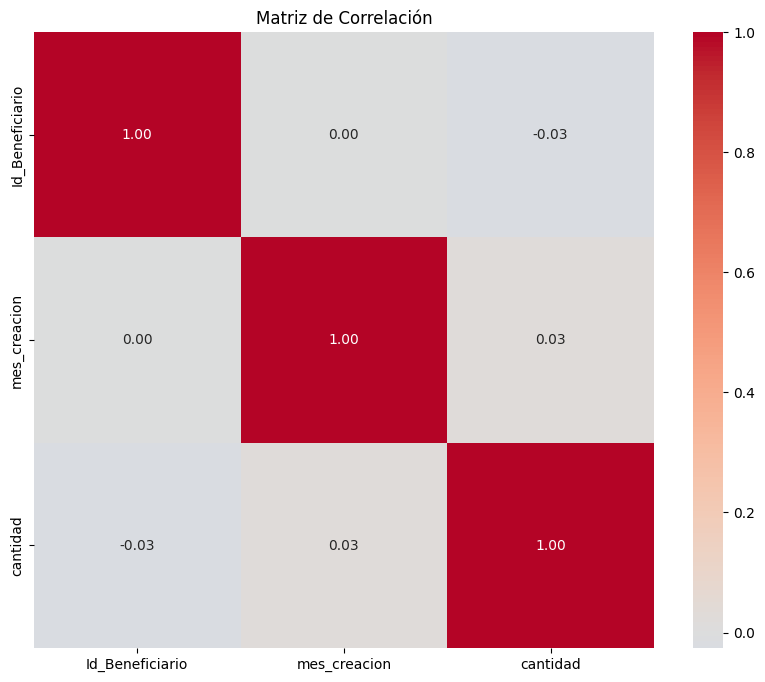

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = dataframe.corr()

# Crear un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
X = dataframe.iloc[:, :-1].values  # Todas las columnas menos la última
y = dataframe.iloc[:, -1].values   # Solo la última columna

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#utiliza cross validacion

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar el scaler en los datos de entrenamiento y transformar
X_train_scaled = scaler.fit_transform(X_train)
# Transformar los datos de prueba usando el scaler ajustado
X_test_scaled = scaler.transform(X_test)



In [ ]:
print (len(X)) #48001
print (len(y)) #48001
print (len(X_train)) #38400
print (len(X_test)) #9601
print (len(y_train)) #38400
print (len(y_test)) #9601
print ("scaler")
print (len(X_train_scaled)) #38400
print (len(X_test_scaled)) #9601




44373
44373
35498
8875
35498
8875
scaler
35498
8875


In [ ]:

def create_model():

  optimizer = Adam(learning_rate=0.001)
  model = Sequential()
  model.add(Input(shape=(2,)))
  # Capa de entrada y primera capa oculta
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.25))
  # Segunda capa oculta
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.25))
  # Tercera capa oculta
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.25))
  # Capa de salida con activación 'softplus' para asegurar valores positivos
  model.add(Dense(1, activation='linear'))
  # Compilar el modelo
  #model.compile(loss='mean_squared_error', optimizer='SGD')
  model.compile(loss='mean_squared_error', optimizer=optimizer)
  return model


# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#configuracion de la validacion cruzada
kf = KFold(n_splits=20, shuffle=True, random_state=42)

#lista para almacenar valor cuadratico medio
mse_scores = []
for train_index, test_index in kf.split(X):
    X_train_scaled, X_test_scaled = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Crear y entrenar el modelo
    model = create_model()
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=5,validation_split=0.1,callbacks=[early_stopping], verbose=1)
    # Evaluar el modelo
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)



# Calcular el error cuadrático medio promedio
average_mse = np.mean(mse_scores)
print(f'Error cuadrático medio promedio en validación cruzada: {average_mse:.4f}')


Epoch 1/50
7588/7588 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 490069.7188 - val_loss: 3.9500
Epoch 2/50
7588/7588 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 131.1960 - val_loss: 3.4077
Epoch 3/50
7588/7588 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 87.4508 - val_loss: 3.4055
Epoch 4/50
7588/7588 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 25.1773 - val_loss: 3.4084
Epoch 5/50
7588/7588 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 14.0577 - val_loss: 3.4041
Epoch 6/50
7588/7588 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 4.0950 - val_loss: 3.4109
Epoch 7/50
7588/7588 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 4.2834 - val_loss: 3.4064
Epoch 8/50
7588/7588 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 3.8912 - val_loss: 3.4055
Epoch 9/50
7588/7588 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 3.7384 - val_loss: 3.4056
Epoch 10/50
7588/7588 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 4.0958 - val_loss: 3.4046
Epoch 11/50
7588/7588 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 3.7317 - val_loss: 3.4058
Epoch 12/

In [ ]:
# Evaluar el modelo en los datos de prueba
# Realizar predicciones
y_pred = model.predict(X_test_scaled)
# Calcular residuos
residuos = y_test - y_pred.flatten()

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
# Calcular Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
#R^2 Score: {r2}
r2 = r2_score(y_test, y_pred)


print("\nPredicciones:")
print(y_pred)
print("\nMétricas de evaluación:")
print(f"Error Cuadrático Medio (MSE): {mse}")
print("\nMétricas de evaluación:")
print(f"Calcular Error Absoluto Medio (MAE): {mae}")
print("\nMétricas de evaluación:")
print(f"R^2 Score: {r2}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Predicciones:
[[0.14317314]
 [0.14317314]
 [0.14317314]
 ...
 [0.14317314]
 [0.14317314]
 [0.14317314]]

Métricas de evaluación:
Error Cuadrático Medio (MSE): 4.355770681174834

Métricas de evaluación:
Calcular Error Absoluto Medio (MAE): 0.9414111263075855

Métricas de evaluación:
R^2 Score: -0.13926096113193398


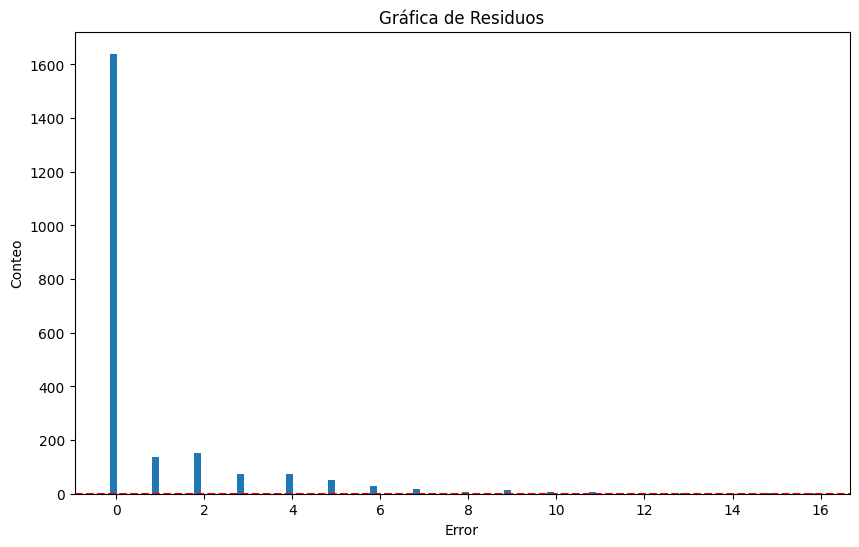

In [ ]:
# Crear la gráfica de residuos
plt.figure(figsize=(10, 6))
#plt.scatter(y_pred, residuos, color='blue', edgecolor='k', alpha=0.7)
plt.hist(residuos,bins=100)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Error')
plt.ylabel('Conteo')
plt.title('Gráfica de Residuos')
plt.show()

In [ ]:
# Guardar las predicciones en un archivo Excel
output = pd.DataFrame(y_pred, columns=['Predicción'])
output.to_excel('predicciones.xlsx', index=False)
print('Predicciones guardadas en predicciones.xlsx')
#y_pred

Predicciones guardadas en predicciones.xlsx


In [ ]:
output = pd.DataFrame(dataframe)
output.to_excel('data.xlsx', index=False)
print('Predicciones guardadas en predicciones.xlsx')


Predicciones guardadas en predicciones.xlsx
